***Requrements.txt File***

In [3]:
with open("requirements.txt", "w") as f:
    f.write("pandas\n")
    f.write("numpy\n")
    f.write("scikit-learn\n")
    f.write("matplotlib\n")
    f.write("imbalanced-learn\n")

In [4]:
# Install required packages
!pip install -r requirements.txt

In [34]:
from google.colab import files
files.download("requirements.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

***Import and Run the Kaggle Files for Credit  Card Fraud Detection***

In [5]:
from google.colab import files
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [6]:
!mkdir -p ~/.kaggle

In [7]:
!cp "kaggle.json" ~/.kaggle/kaggle.json


In [8]:
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets list -s creditcard


ref                                                        title                                                size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ---------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
jacklizhi/creditcard                                       creditcard                                       69155672  2017-11-03 06:19:34.247000           5638         67  0.64705884       
iabhishekofficial/creditcard-fraud-detection               CreditCard-Fraud-Detection                        7519804  2023-07-22 06:23:30.113000           5041         52  0.7647059        
mojtaba142/hotel-booking                                   Hotel Booking                                     4617760  2021-06-29 05:15:54.050000          45280        319  1.0              
gauravtopre/bank-customer-churn-dataset           

In [10]:
!kaggle datasets download -d mlg-ulb/creditcardfraud


Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
  0% 0.00/66.0M [00:00<?, ?B/s]
100% 66.0M/66.0M [00:00<00:00, 1.31GB/s]


In [11]:
!unzip creditcardfraud.zip


Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


***Import Libraries***

In [12]:
import pandas as pd
import numpy as np

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

***Load Dataset***

In [14]:
df = pd.read_csv("creditcard.csv")
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


***Checking the Class Distribution***

Class
0    284315
1       492
Name: count, dtype: int64


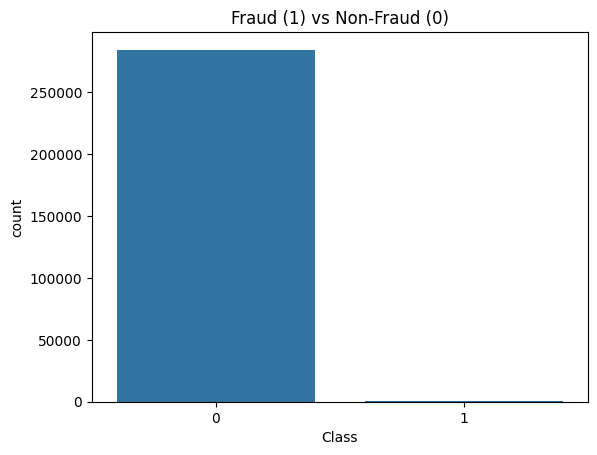

In [15]:
print(df['Class'].value_counts())

sns.countplot(x='Class', data=df)
plt.title("Fraud (1) vs Non-Fraud (0)")
plt.show()

***Splitting both Features and the Targets***

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape, " Test:", X_test.shape)

Train: (227845, 30)  Test: (56962, 30)


***Scaling and Smote***

In [17]:
# --- Scaling BEFORE SMOTE ---
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [18]:
# 1. Scale training and test sets first
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # scale training set
X_test_scaled = scaler.transform(X_test)         # scale test set

In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("After SMOTE:", X_train_resampled.shape)
print("Class distribution:\n", y_train_resampled.value_counts())

After SMOTE: (454902, 30)
Class distribution:
 Class
0    227451
1    227451
Name: count, dtype: int64


***Splitting the Data to two sets(Training and Testing with ratio 80:20)***

In [20]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = df.drop("Class", axis=1)   # Assuming target column is 'Class'
y = df["Class"]

# split before SMOTE (to avoid data leakage)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

#  SMOTE only on training data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Resampled training set shape:", X_train_resampled.shape)
print("Resampled class distribution:", y_train_resampled.value_counts())

Training set shape: (227845, 30)
Testing set shape: (56962, 30)
Resampled training set shape: (454902, 30)
Resampled class distribution: Class
0    227451
1    227451
Name: count, dtype: int64


**Training the Model**


In [21]:
# --- Imports ---
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, precision_recall_curve
)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# --- Helper function ---
def get_metrics(y_true, y_pred, y_proba, model_name):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "ROC-AUC": roc_auc_score(y_true, y_proba)
    }

results = []


In [23]:
# --- Random Forest (Default Parameters) ---
rf = RandomForestClassifier(random_state=42)   # default params only
rf.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

results.append(get_metrics(y_test, y_pred_rf, y_proba_rf, "Random Forest"))

In [24]:
# --- Results table ---
df_results = pd.DataFrame(results)
print(df_results)

           Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Random Forest  0.999403   0.826531  0.826531  0.826531  0.964423


***ROC AND PERCISION-RECALL CURVE***

ROC CURVE

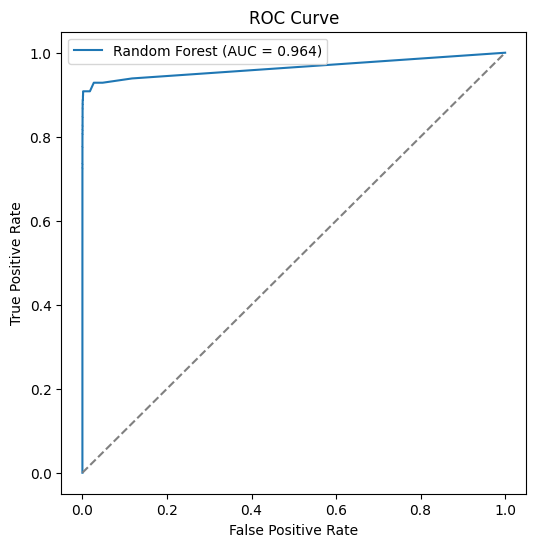

In [25]:
# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_proba_rf):.3f})")
plt.plot([0,1],[0,1],'--',color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

PERSION-RECALL CURVE

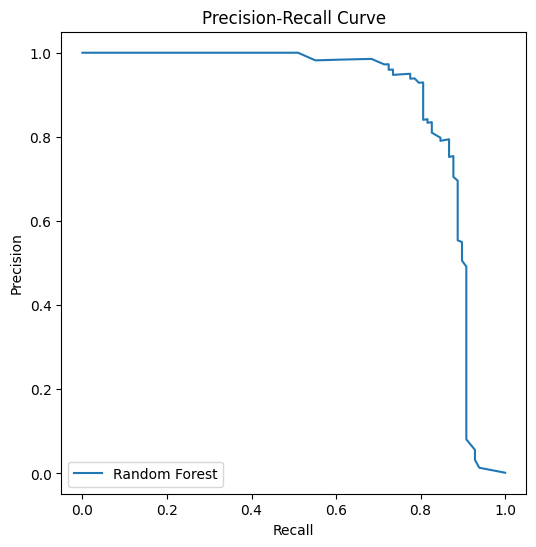

In [26]:
# --- Precision-Recall Curve ---
precision, recall, _ = precision_recall_curve(y_test, y_proba_rf)
plt.figure(figsize=(6,6))
plt.plot(recall, precision, label="Random Forest")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

***Traing Random Forest witout SMOTE***

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
# --- Random Forest WITHOUT SMOTE (default params) ---
rf_no_smote = RandomForestClassifier(random_state=42)   # default params only
rf_no_smote.fit(X_train, y_train)   #  no resampling here

y_pred_rf_no_smote = rf_no_smote.predict(X_test)
y_proba_rf_no_smote = rf_no_smote.predict_proba(X_test)[:, 1]

results.append(get_metrics(y_test, y_pred_rf_no_smote, y_proba_rf_no_smote, "Random Forest (No SMOTE)"))

In [29]:
# --- Results table (only No SMOTE) ---
df_results_no_smote = pd.DataFrame([get_metrics(
    y_test, y_pred_rf_no_smote, y_proba_rf_no_smote, "Random Forest (No SMOTE)"
)])
print(df_results_no_smote)

                      Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Random Forest (No SMOTE)  0.999596   0.941176  0.816327  0.874317  0.963027


***ROC AND PRECISION-RECALL CURVES***

ROC

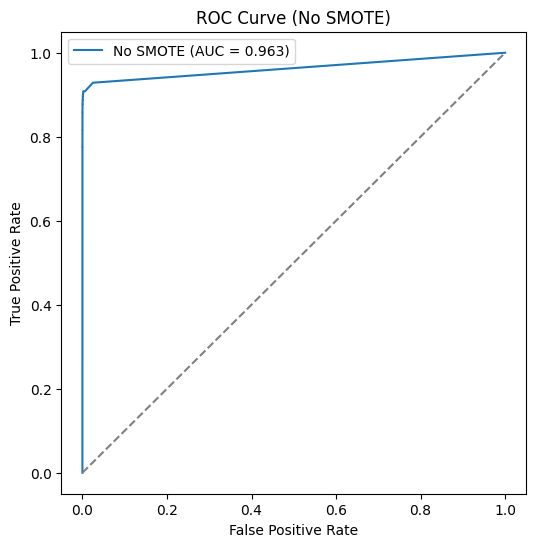

In [30]:
# --- ROC Curve (No SMOTE) ---
fpr_ns, tpr_ns, _ = roc_curve(y_test, y_proba_rf_no_smote)
plt.figure(figsize=(6,6))
plt.plot(fpr_ns, tpr_ns, label=f"No SMOTE (AUC = {roc_auc_score(y_test, y_proba_rf_no_smote):.3f})")
plt.plot([0,1],[0,1],'--',color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (No SMOTE)")
plt.legend()
plt.show()

PERCISION-RECALL

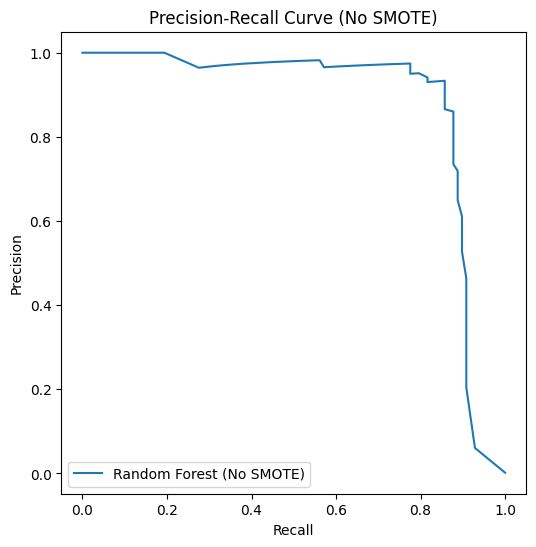

In [31]:
# --- Precision-Recall Curve ---
precision, recall, _ = precision_recall_curve(y_test, y_proba_rf_no_smote)
plt.figure(figsize=(6,6))
plt.plot(recall, precision, label="Random Forest (No SMOTE)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (No SMOTE)")
plt.legend()
plt.show()

In [32]:
# --- Results table ---
df_results = pd.DataFrame(results)
print(df_results)

                      Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0             Random Forest  0.999403   0.826531  0.826531  0.826531  0.964423
1  Random Forest (No SMOTE)  0.999596   0.941176  0.816327  0.874317  0.963027


***Comparison Chart***

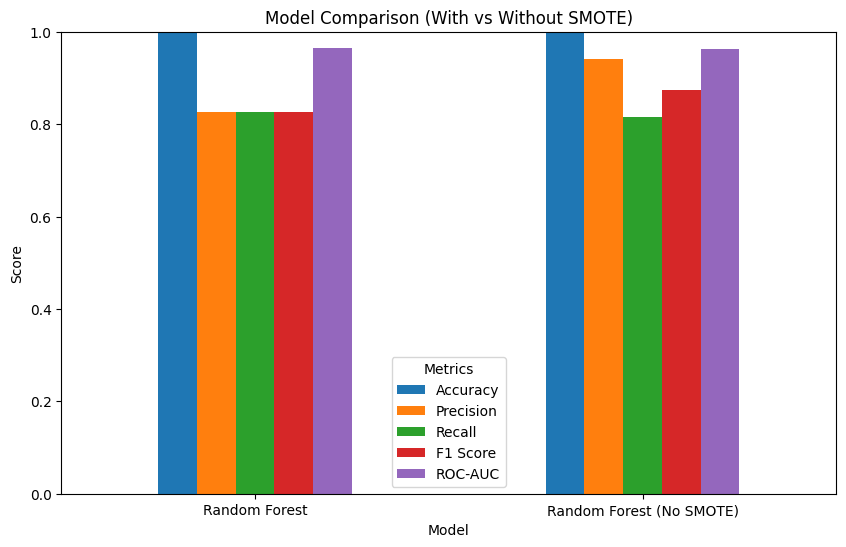

In [33]:
# --- Comparison Bar Plot ---
metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"]

df_results_plot = df_results.set_index("Model")[metrics_to_plot]

df_results_plot.plot(kind="bar", figsize=(10,6))
plt.title("Model Comparison (With vs Without SMOTE)")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.ylim(0,1)  # since metrics are between 0 and 1
plt.show()